## Assignment 2 

### Onset Detector 

Sometimes its useful to find where events in a musical file occurred, these are often called **onsets**. 

They are often characterised by a **peak in the signal** of the audio. 

The simplest approach would be to record every sample above a given threshold as a new onset.

However, these **onsets** and their peaks often occur over a length of time, and so the signal may be above a chosen threshold for a number of samples, but we want to identify these as **a single event**. 

As we step through the signal (sample by sample), there are a number of rules we can apply to determine if something is a **new onset** 

### The Algorithm


1. Is the sample value larger than any of the values surrounding it (+ / - a ``window_size``)?


2. Is the sample value larger than the average of all the values surrounding it (+ / - a ``window_size``)?


3. Have we had a onset recently (within a given ``wait_time``)?


### Task 1

Code an onset detector using the algorithm described above. We have provided a template of an approach you might like to take below. 

We want to save the onsets as we go (the sample location and the value) and then plot them on the **same plot as the original waveform**

The result should look like this (with the audio data in blue and onsets in orange).

There are libraries that will find onsets for you, but we would like you to this yourself implementing the algorithm described!

![alt text](onsets.png)

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
audio_data, sr = librosa.load('audio/drums0.wav')

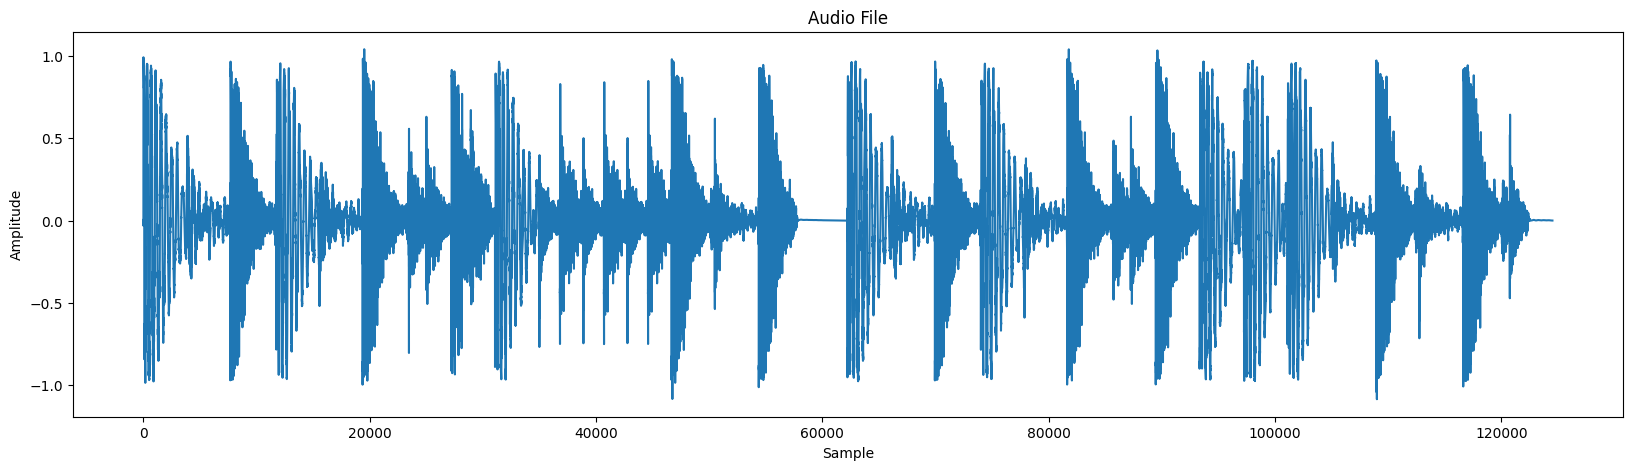

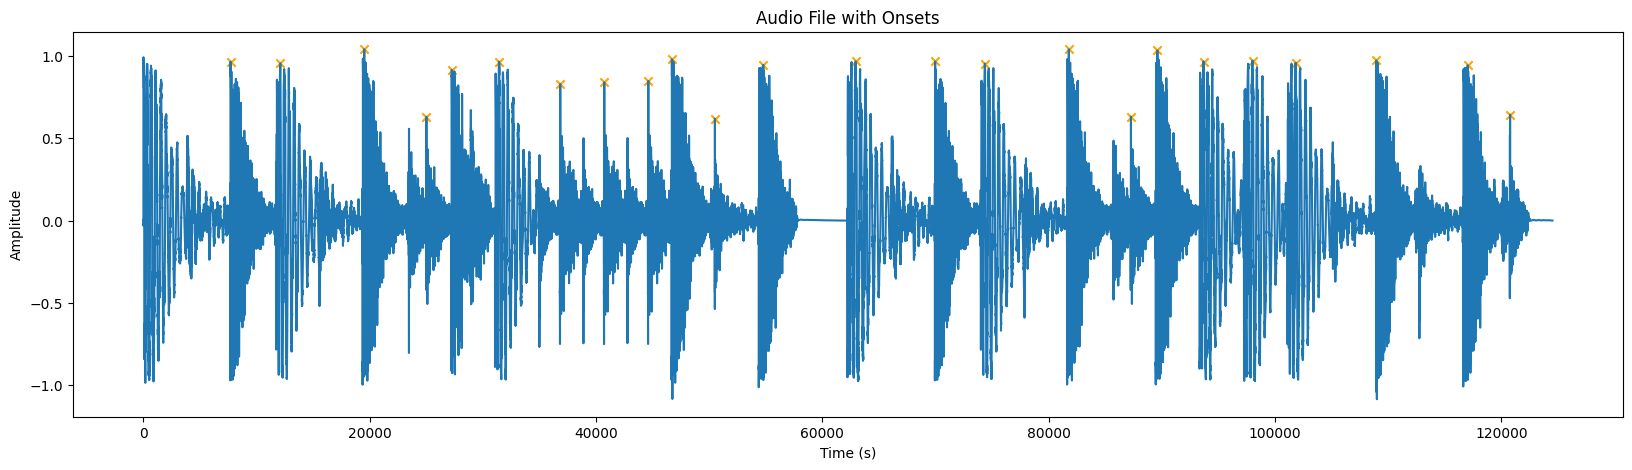

In [3]:
window_size = 2048
wait_time = 1024

times = []
onsets = []


## for every sample (careful to account for window size at the beginning and end)

for i in range(window_size, len(audio_data) - window_size):
    
    if audio_data[i] == max(audio_data[i - window_size:i + window_size]):
        if audio_data[i] > np.mean(audio_data[i - window_size:i + window_size]):
            if not times or i - times[-1] > wait_time:

                times.append(i)
                onsets.append(audio_data[i])
    
                
                
## plot audio file
plt.figure(figsize=(20, 5))
plt.plot(audio_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Audio File')
plt.show()


## plot onset times and values on same plot
plt.figure(figsize=(20, 5))
plt.plot(audio_data)
plt.scatter(times, onsets, color='orange', marker='x')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio File with Onsets')
plt.show()


### Task 2 

Experiment with different settings for the your onset detector.

Provide a short discussion (max 250 words) on the advantages and disadvantages from having longer or shorter  ``window_size``s and ``wait_time``s.

Using a smaller windows size may result in smaller computed window averages. It may be difficult to avoid the influence of small noise. Using too large windows size may cause some values ​​​​with small values ​​​​to be lost due to the large average value. Using a smaller wait time will cause too many similar points. Using a larger wait time will result in data loss.

